<a href="https://colab.research.google.com/github/cherlimSG/ML/blob/main/Regression_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN for regression#

In [ ]:
# Dataset description: 442 diabetes patients
# 10 baseline varialbes (features) and 1 outcome (Target)
# age, sex, body mass index, blood pressure, 6 blood serum measurements (s1-s6)
# Target: A quantitative measure of disease progression 1 year after baseline
# Each of these 10 feature variables have been mean centered and scaled by the 
# standard deviation multipled by n_samples (see below explanation)
# i.e. the sum of squares of each column totals 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import sklearn as skl

# Load the diabetes dataset

Use `datasets.load_diabetes()` to load data. 

Refer to the this [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) for more information.

In [ ]:
 data_diabetes = datasets.load_diabetes(return_X_y = False)
 print(skl.__version__) # ver 0.22.2 does not support as_frame in loading datasets 

0.22.2.post1


Print names of features:

In [ ]:
print(data_diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
X_diabetes, y_diabetes = data_diabetes.data, data_diabetes.target

Let's have more information on this dataset. Can you try to print out the following information

- type of `X_diabetes` and its shape
- type of `y_diabetes` and its shape

Based on the output of `print(data_diabetes.feature_names)`, do you know which column of `X_diabetes` stores 'bmi'?

In [ ]:
print(type(X_diabetes), X_diabetes.shape, '\n')

print(type(y_diabetes), y_diabetes.shape)

<class 'numpy.ndarray'> (442, 10) 

<class 'numpy.ndarray'> (442,)


# KNN Regression


## Step1: Prepare data for KNN regression

The 3rd column of the dataset is extracted using ``X_diabetes[:, [2]]``. Use ``train_test_split`` to split it into ``X_train`` and 

In [ ]:
# You can change ``test_size`` 
# ``test_size = 0.3`` means that the testing data is 30% of the total data (and training data is 70% of the total data)
# You can change random_state too. You can omit it. (Each time you run the test set and training set will be different from the last try)
# Use just one feature "bmi" to predict target.

test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X_diabetes[:, [2]], y_diabetes, test_size = test_size, random_state = 1)

Print sizes of ``X_train`` and ``X_test``.

In [ ]:
print("X_train shape = ", X_train.shape) # 70% of 442 = 309
print("X_test shape = ", X_test.shape) # 30% of 442 = 133

X_train shape =  (309, 1)
X_test shape =  (133, 1)


## Step 2: Define your model and train it

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Create `my_KNN`, set `n_neighbors` to $1$.

In [ ]:
my_KNN = KNeighborsRegressor(n_neighbors = 1)

Training a KNN is just to save the training data!

In [ ]:
my_KNN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

## Step 3: Evaluate your model on testing set

Feeding `X_test` to `my_KNN` to have `y_predict_test` and then use `y_test` and `y_predict_test` to have $\text{MSE}$ and $\text{RMSE}$.

In [ ]:
y_predict_test = my_KNN.predict(X_test)


In [ ]:
MSE_test = mean_squared_error(y_test, y_predict_test)
RMSE_test = np.sqrt(MSE_test)


print("MSE on the test set = %.2f" % MSE_test)
print("RMSE on the test set = %.2f" % RMSE_test)


MSE on the test set = 7283.80
RMSE on the test set = 85.35


How about $\text{MSE}$ and $\text{RMSE}$ on the training set

In [ ]:
y_predict_train = my_KNN.predict(X_train)
MSE_train = mean_squared_error(y_train, y_predict_train)
RMSE_train = np.sqrt(MSE_train)
R2_score_train = r2_score(y_train, y_predict_train)

print("MSE on the training set = %.2f" % MSE_train)
print("RMSE on the training set = %.2f" % RMSE_train)
print("R2 score on training set = %.2f" % R2_score_train)

MSE on the training set = 4105.90
RMSE on the training set = 64.08
R2 score on training set = 0.35


# What is value of n_neighbors you should use?

##Optimizing the model##

When we define our KNN regressor: ``my_KNN = neighbors.KNeighborsRegressor(n_neighbors = 1)`` we set ``n_neighbors`` to $1$. Clearly, this can be changed. Let's see which value of ``n_neighbors`` is good!

## Training / Validation / Test sets

Divide our dataset into three parts:
- Training set

- Validation set

- Test set

The size of each part depends on your choice. However, 60%, 20$ and 20% can be a good choice.

#### Activity 1: Divide the dataset into three parts.

In [ ]:
# Your code
# First step: divide it into 80% and 20% 
#X_train, X_test, y_train, y_test = train_test_split(X_diabetes[:, [2]], y_diabetes, test_size = test_size, random_state = 1)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_diabetes[:, [2]], y_diabetes, test_size = 0.2, random_state = 1)

In [ ]:
# Then, divide the 80% portion into 
# - training set
# - test set: 20% of the original set ==> 25% of this 80% portion

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state = 1)

## Searching for the best `n_neighbors`.

###Activity 2: Write a function called `get_mse`

Inputs:

- `X_train`, `y_train`, `X_val`, `y_val`, and
- `n_neighbors`

Ouput:
- `train_mse`: $\text{MSE}$ on the training set
-`val_mse`: $\text{MSE}$ on the validation set

In [ ]:
# Your code

def get_mse(X_train, y_train, X_val, y_val, n_neighbors):

  # Define your KNN regressor and train it with n_neighbors
  my_KNN = KNeighborsRegressor(n_neighbors = n_neighbors)
  my_KNN.fit(X_train, y_train)

  # determine MSE on training set
  y_predict_train = my_KNN.predict(X_train)
  train_mse = mean_squared_error(y_train, y_predict_train)

  # determine MSE on testing set
  y_predict_val = my_KNN.predict(X_val)
  val_mse = mean_squared_error(y_val, y_predict_val)
  

  return train_mse, val_mse 

###Activity 3: Use `get_mse()` to get `train_mse` and `val_mse` for an array of `n_neighbors`.

Make use of the function ``get_mse`` to get $\text{MSE}$'s for ``n_neighbors`` from $1$ to $80$.

In [ ]:
# Your code
train_mse_array = []
val_mse_array = []

neighbors_array = range(1,81)

for n in neighbors_array:
  temp = get_mse(X_train, y_train, X_val, y_val, n)

  train_mse_array.append(temp[0])

  val_mse_array.append(temp[1])

###Activity 4: Plot `train_mse_array` and `val_mse_array`. Choose the best `n_neighbors`.

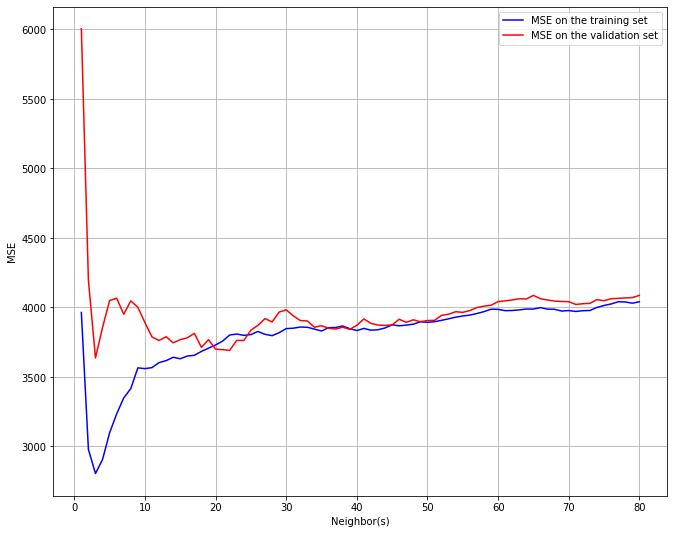

In [ ]:
plt.figure(figsize = (11, 9))

plt.plot(neighbors_array, train_mse_array, color = 'blue', label = "MSE on the training set")
plt.plot(neighbors_array, val_mse_array, color = 'red', label = "MSE on the validation set")

plt.legend() # to show legends
plt.xlabel('Neighbor(s)')
plt.ylabel('MSE')
plt.grid()
plt.show()


###Activity 5: What is the best number of neighbors?

Your answer: 40

## What is your final model?

You have divided your available data into three parts and search for the best number of neighbors in KNN regression. You have used the training set and validation set. Up to ths point you may ask:

1) What is your final model?

2) How do you use the test set?

The answers are:

1) Use the training set AND the validation set to have the final model (with the best number of neighbors we found above).

2) Use the final model and test it on the test set. The result of this step is the final verdict on your design.

####Actitity 5: Final model and its performance on the test set.

In [ ]:
# Create your final model
my_KNN_Final = KNeighborsRegressor(n_neighbors = 40)

# Train it
my_KNN_Final.fit(X_train, y_train)

# Test it on the test set
y_predict_test = my_KNN_Final.predict(X_test)

MSE_test = mean_squared_error(y_test, y_predict_test)
RMSE_test = np.sqrt(MSE_test)

print("MSE (final model) on the test set = %.2f" % MSE_test)
print("RMSE (final model) on the test set = %.2f" % RMSE_test)

MSE (final model) on the test set = 4091.47
RMSE (final model) on the test set = 63.96


# Exploring the dataset 

        age  sex      bmi   bp  ...        s4        s5   s6    Target
age     1.0  NaN      NaN  NaN  ...       NaN       NaN  NaN       NaN
sex     NaN  1.0      NaN  NaN  ...       NaN       NaN  NaN       NaN
bmi     NaN  NaN  1.00000  NaN  ...       NaN       NaN  NaN  0.586450
bp      NaN  NaN      NaN  1.0  ...       NaN       NaN  NaN       NaN
s1      NaN  NaN      NaN  NaN  ...  0.542207  0.515501  NaN       NaN
s2      NaN  NaN      NaN  NaN  ...  0.659817       NaN  NaN       NaN
s3      NaN  NaN      NaN  NaN  ...       NaN       NaN  NaN       NaN
s4      NaN  NaN      NaN  NaN  ...  1.000000  0.617857  NaN       NaN
s5      NaN  NaN      NaN  NaN  ...  0.617857  1.000000  NaN  0.565883
s6      NaN  NaN      NaN  NaN  ...       NaN       NaN  1.0       NaN
Target  NaN  NaN  0.58645  NaN  ...       NaN  0.565883  NaN  1.000000

[11 rows x 11 columns]


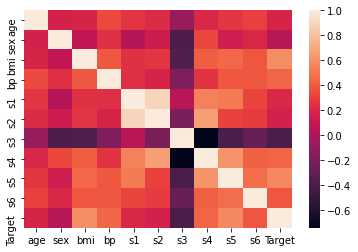

In [ ]:
#Exploring the dataset 
# Calculate correlation coefficients of features 
#Convert dataset into dataframe

import pandas as pd
import seaborn as sns
diab = datasets.load_diabetes()
diab_frame = pd.DataFrame(data=diab.data, columns=diab.feature_names)
diab_frame["Target"] = diab.target
#print(diab_frame.columns)
#print(diab_frame.head())

corr = diab_frame.corr()
print(corr[corr>0.5]) #filter to see the high corr pairs
#Results: Corr > 0.5 = Target-BMI; Target-s5; s4-s1; s4-s2; s4-s5; s5-s1)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Corr > 0.5: Target-bmi; Target-s5; Dependency observed: s1-s4; s1-s5; s2-s4; s4-s5;

# Compare results: Search for best neighbours between X_train_val and X_test

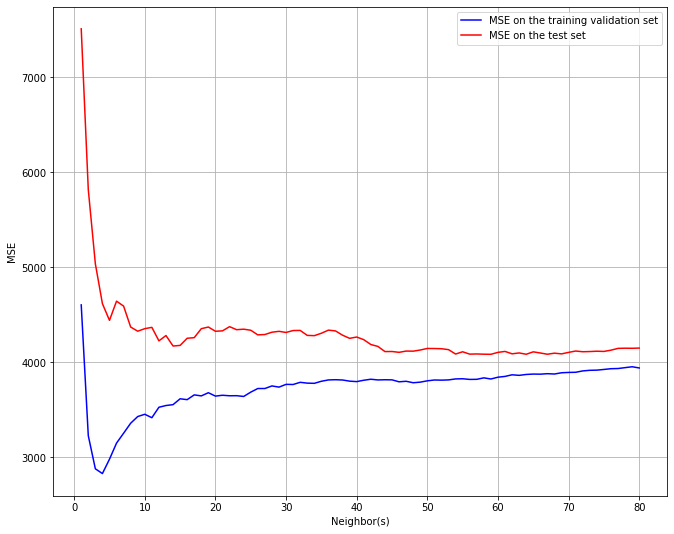

In [ ]:
# Your code
train_val_mse_array = []
test_mse_array = []

neighbors_array = range(1,81)

for n in neighbors_array:
  temp = get_mse(X_train_val, y_train_val, X_test, y_test, n)

  train_val_mse_array.append(temp[0])

  test_mse_array.append(temp[1])

plt.figure(figsize = (11, 9))

plt.plot(neighbors_array, train_val_mse_array, color = 'blue', label = "MSE on the training validation set")
plt.plot(neighbors_array, test_mse_array, color = 'red', label = "MSE on the test set")

plt.legend() # to show legends
plt.xlabel('Neighbor(s)')
plt.ylabel('MSE')
plt.grid()
plt.show()



In [ ]:
# Create your final model
my_KNN_Final = KNeighborsRegressor(n_neighbors = 44)

# Train it
my_KNN_Final.fit(X_train_val, y_train_val)

# Test it on the test set
y_predict_test = my_KNN_Final.predict(X_test)

MSE_test = mean_squared_error(y_test, y_predict_test)
RMSE_test = np.sqrt(MSE_test)

print("MSE (final model) on the test set = %.2f" % MSE_test)
print("RMSE (final model) on the test set = %.2f" % RMSE_test)

MSE (final model) on the test set = 4112.43
RMSE (final model) on the test set = 64.13
